# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [307]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Load IMDb dataset
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [308]:
# Create a new column called 'title_length' with the length (number of characters) of each title

In [309]:
df["title_length"] = df["title"].str.len()
print(df[["title", "title_length"]].head())


                      title  title_length
0  The Shawshank Redemption            24
1             The Godfather            13
2    The Godfather: Part II            22
3           The Dark Knight            15
4              Pulp Fiction            12


In [310]:
# Calculate mean, median, and mode of the 'title_length' column

In [311]:
title_length_mean = df["title_length"].mean()
title_length_median = df["title_length"].median()
title_length_mode = df["title_length"].mode()

print("Mean:", round(title_length_mean, 2))
print("Median:", round(title_length_median, 2))
print("Mode:", title_length_mode.iloc[0])

Mean: 15.48
Median: 14.0
Mode: 12


In [312]:
# Calculate the range, variance, and standard deviation of 'title_length'

In [313]:
title_length_range = df["title_length"].max() - df["title_length"].min()
title_length_variance = df["title_length"].var()
title_length_std = df["title_length"].std()

print("Range:", round(title_length_range, 2))
print("Variance:", round(title_length_variance, 2))
print("Standard deviation:", round(title_length_std, 2))

Range: 67
Variance: 72.11
Standard deviation: 8.49


In [314]:
# Calculate skewness and kurtosis of the 'title_length' column

In [315]:
title_length_skewness = df["title_length"].skew()
title_length_kurtosis = df["title_length"].kurtosis()

print("Skewness:", round(title_length_skewness, 2))
print("Kurtosis:", round(title_length_kurtosis, 2))

Skewness: 1.53
Kurtosis: 3.81


In [316]:
# Print the shortest and longest title based on their length

In [317]:
title_lengths = df["title_length"]
shortest_idx = title_lengths.idxmin()
longest_idx = title_lengths.idxmax()
shortest_title = df.at[shortest_idx, "title"]
longest_title = df.at[longest_idx, "title"]

print("Shortest title:", shortest_title)
print("Longest title:", longest_title)

Shortest title: M
Longest title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


In [318]:
# plot your results

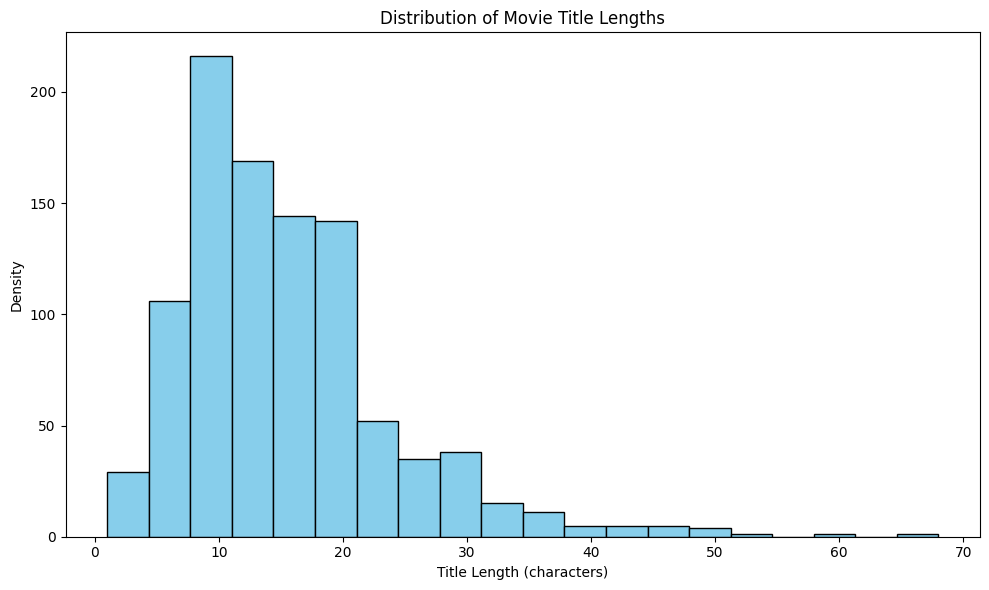

In [319]:
plt.figure(figsize=(10, 6))
plt.hist(df["title_length"], bins=20,  color="skyblue", edgecolor="black")


plt.title("Distribution of Movie Title Lengths")
plt.xlabel("Title Length (characters)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

**Graph interpretation**
- The bars show how many titles fall into each length range (histogram), scaled to density.
- The orange curve is a smoothed density estimate that highlights the overall shape of the distribution.
- Peaks indicate common title lengths; long right tails indicate a few unusually long titles.

---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [320]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]
sample_lengths = df["title_length"].sample(5, random_state=42).tolist()
print(sample_lengths)

[22, 19, 7, 15, 19]


In [321]:
# Calculate the mean of the 5 values
sample_mean = sum(sample_lengths) / len(sample_lengths)
print("Sample mean:", round(sample_mean, 2))

Sample mean: 16.4


In [ ]:
# Calculate the squared differences with respect to the mean: (x_i - x_bar) ** 2
squared_diffs = [(x - sample_mean) ** 2 for x in sample_lengths]
rounded_diffs = [round(value, 2) for value in squared_diffs]
print(rounded_diffs)

[31.36, 6.76, 88.36, 1.96, 6.76]


In [ ]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation
sample_variance = sum(squared_diffs) / len(squared_diffs)
sample_std = sample_variance ** 0.5

print("Sample variance:", round(sample_variance, 2))
print("Sample standard deviation:", round(sample_std, 2))

Sample variance: 27.04
Sample standard deviation: 5.2
